<a href="https://colab.research.google.com/github/pathilink/flash_case/blob/main/notebook/flash_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#FE2B8E>Technical Analytics Case - Flash</font>

## Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.precision', 2) # decimal
# pd.set_option('float_format', '{:.2f}'.format) # scientific notation

## Data

In [3]:
# import the google.colab module
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cards_df = pd.read_csv('/content/drive/MyDrive/test/flash/data_raw/cards.csv')
status_df = pd.read_csv('/content/drive/MyDrive/test/flash/data_raw/cards_status.csv')
transactions_df = pd.read_csv('/content/drive/MyDrive/test/flash/data_raw/cards_transactions.csv')

## EDA

### cards_df

In [5]:
cards_df.sample(5)

,card_number,card_model,company_id,employee_id,valid_thru
36450,557807025,CONTACTLESS,6332f16d29f7f69333ca2394,6399e1936aaaae7befbc491d,10/24
264530,547403385,CONTACTLESS,63246c659de625fbaa17fc41,633ff38c1ca247c82cd73c49,08/24
84301,222187965,PIN,60e513a647520000097f4bfa,6202bac6e196fb273932f79a,12/23
192364,182601465,PIN,61156af04b4b950008f330d0,611e63facec6050008673a93,07/23
260727,242776500,CONTACTLESS,6250632ffd0cb19197d5b1b9,626fcdcf369e2d799a76d195,03/24


In [6]:
print(f'cards_df has {cards_df.shape[0]} rows and {cards_df.shape[1]} columns.')

cards_df has 288093 rows and 5 columns.


In [7]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288093 entries, 0 to 288092
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   card_number  288093 non-null  int64 
 1   card_model   288093 non-null  object
 2   company_id   287987 non-null  object
 3   employee_id  288018 non-null  object
 4   valid_thru   288093 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.0+ MB


In [8]:
# missing data
total = cards_df.isnull().sum().sort_values(ascending=False)
percent = (cards_df.isnull().sum()/cards_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing_data.query('Total > 0')

,Total,Percentage
company_id,106,0.000368
employee_id,75,0.000260


In [9]:
# unique values
cards_df['card_model'].unique()

array(['PIN', 'CONTACTLESS'], dtype=object)

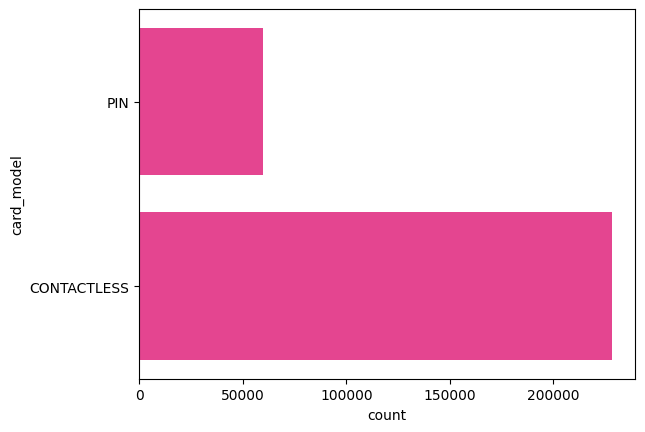

In [10]:
# card model distribution
sns.countplot(data=cards_df, y='card_model', color='#FE2B8E')

plt.show()

In [11]:
# card distribution by company_id
cards_df.groupby(['company_id','card_model'])['card_number'].count().reset_index().sort_values(by='card_number', ascending=False)


,company_id,card_model,card_number
7846,613bb466a9517c00099d37c2,CONTACTLESS,1469
13003,622a549c256d4b7922337eeb,CONTACTLESS,1464
10365,61b89cf2c3868a4e89c654fc,CONTACTLESS,1041
13075,622f86082d1718b02e8efd3f,CONTACTLESS,995
12431,6213c84acab8cf0bf2d4e87b,CONTACTLESS,875
...,...,...,...
11917,6203b853f09840a353a046a1,PIN,1
22755,63ea49ab26f5c45ebe18b4e4,CONTACTLESS,1
22754,63ea429d6f7cb79cd6149cec,CONTACTLESS,1
22751,63ea26ecd6571fc568f7b04b,CONTACTLESS,1


In [12]:
# change card_number type
cards_df['card_number'] = cards_df['card_number'].astype(str)
type(cards_df['card_number'][0])

str

In [13]:
# change format
cards_df['valid_thru'] = cards_df['valid_thru'].apply(lambda x: f'01-{x.replace("/", "-20")}')

# change type
cards_df['valid_thru'] = pd.to_datetime(cards_df['valid_thru'], format='%d-%m-%Y')

cards_df['valid_thru'].head()


,valid_thru
0,2023-01-01
1,2023-01-01
2,2023-01-01
3,2023-01-01
4,2023-01-01


### status_df

In [14]:
status_df.sample(5)

,card_number,card_model,card_type,card_status,started_at,ended_at
87752,237669360,CONTACTLESS,PLASTIC,OPEN,2022-07-04,NaN
297937,287994435,CONTACTLESS,PLASTIC,OPEN,2023-07-19,2023-07-19
229576,599965575,CONTACTLESS,PLASTIC,OPEN,2023-06-01,2023-06-05
213975,271311435,CONTACTLESS,PLASTIC,OPEN,2022-12-16,NaN
69053,597159405,CONTACTLESS,PLASTIC,PERMANENTLY_TERMINATED,2023-07-31,NaN


In [15]:
print(f'status_df has {status_df.shape[0]} rows and {status_df.shape[1]} columns.')

status_df has 498219 rows and 6 columns.


In [16]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498219 entries, 0 to 498218
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   card_number  498219 non-null  int64 
 1   card_model   498219 non-null  object
 2   card_type    498219 non-null  object
 3   card_status  498219 non-null  object
 4   started_at   498219 non-null  object
 5   ended_at     210126 non-null  object
dtypes: int64(1), object(5)
memory usage: 22.8+ MB


In [17]:
status_df['card_model'].unique()

array(['PIN', 'CONTACTLESS'], dtype=object)

In [18]:
status_df['card_type'].unique()

array(['PLASTIC'], dtype=object)

In [19]:
status_df['card_status'].unique()

array(['OPEN', 'PERMANENTLY_TERMINATED', 'TEMPORARILY_BLOCKED'],
      dtype=object)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


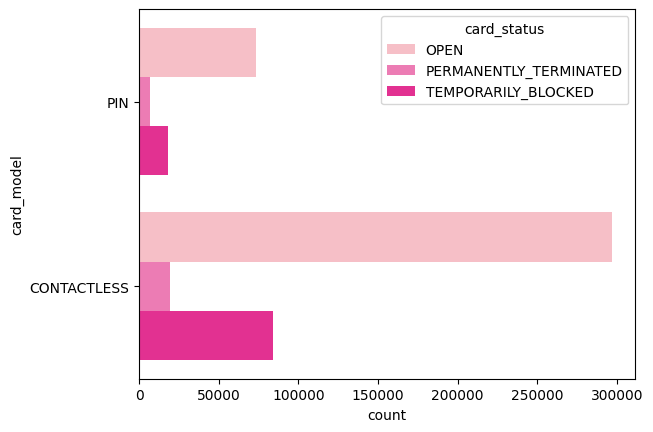

In [20]:
# card_model x card_status: is it related?
pink_palette = sns.color_palette(["#FFB6C1", "#FF69B4", "#FF1493"])

sns.countplot(data=status_df, y='card_model', hue='card_status', palette=pink_palette);

In [21]:
# change dates type

status_df['started_at'] = pd.to_datetime(status_df['started_at'])
status_df['ended_at'] = pd.to_datetime(status_df['ended_at'])
status_df['started_at'].head()

,started_at
0,2022-07-25
1,2022-05-02
2,2022-05-27
3,2023-03-03
4,2022-12-14


In [22]:
# min & max: dates


### transactions_df

In [23]:
transactions_df.sample(5)

,card_number,transaction_id,transaction_date,amount
1988220,241892925.0,txIR0cI598UGh7p_znLvj,2023-07-07T09:34:08.000Z,14.90
3460773,289176465.0,4sbAlnSEAwddRZdCRT7ID,2023-04-04T21:56:24.000Z,12.80
2408957,578141865.0,B_a38_C_7xs97nuBuzAHf,2023-06-17T19:06:27.000Z,60.00
13571490,545215830.0,u0fsChkRGwbJfuM4WFL6_,2023-01-07T11:50:18.000Z,31.00
11237583,240004365.0,24q8cwx03WmaIHinsClpR,2023-03-25T17:06:02.000Z,8.34


In [24]:
print(f'transactions_df has {transactions_df.shape[0]} rows and {transactions_df.shape[1]} columns.')

transactions_df has 13979889 rows and 4 columns.


In [25]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979889 entries, 0 to 13979888
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   card_number       float64
 1   transaction_id    object 
 2   transaction_date  object 
 3   amount            float64
dtypes: float64(2), object(2)
memory usage: 426.6+ MB


In [26]:
# missing data
total = transactions_df.isnull().sum().sort_values(ascending=False)
percent = (transactions_df.isnull().sum()/transactions_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing_data#.query('Total > 0')

,Total,Percentage
card_number,0,0.0
transaction_id,0,0.0
transaction_date,0,0.0
amount,0,0.0


In [27]:
# amount distribution

In [28]:
# change date type